Examining and Visualizing Data
=============================

<div class="alert alert-block alert-info"> 
<h2>Overview</h2>

<strong>Questions:</strong>

* How can I use pandas to process data?

* How can I visualize relationships between different parts of my data?

<strong>Objectives:</strong>

* Use pandas and seaborn to load and explore data

</div>

[Pandas](https://pandas.pydata.org/docs/) is a Python library used for data analysis and manipulation. Within the world of data science, it is a ubiquitous and widely used library. If you are learning how to analyze data in Python, it will be almost impossible to avoid pandas. 

The central data structure of pandas is called a DataFrame. Pandas DataFrames work very closely with NumPy arrays and Pandas dataframes are specifically for data which is two dimensional (rows and columns). NumPy arrays, while similar in some ways, can work with higher dimensional data. 

Pandas is very powerful. In this session, we'll be learning how to access information in pandas dataframes and how to do some basic manipulation and analysis. We are going to be looking at a dataset which gives information about the elements in the periodic table.

In [1]:
import pandas as pd
df = pd.read_csv("data/PubChemElements_all.csv")

## Examining Data

Initially when loading data in, and also at certain points as we're working with it, we'll want to see what our dataframe looks like. Youo can see a preview of your dataframe using the `.head` function

In [2]:
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808


The `.info` function will give information about the columns and the data type of those columns. The data type will become very important later as we work with data more.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AtomicNumber           118 non-null    int64  
 1   Symbol                 118 non-null    object 
 2   Name                   118 non-null    object 
 3   AtomicMass             118 non-null    float64
 4   CPKHexColor            108 non-null    object 
 5   ElectronConfiguration  118 non-null    object 
 6   Electronegativity      95 non-null     float64
 7   AtomicRadius           113 non-null    float64
 8   IonizationEnergy       102 non-null    float64
 9   ElectronAffinity       57 non-null     float64
 10  OxidationStates        103 non-null    object 
 11  StandardState          118 non-null    object 
 12  MeltingPoint           103 non-null    float64
 13  BoilingPoint           93 non-null     float64
 14  Density                96 non-null     float64
 15  GroupB

For this dataframe, we see that the first column, `AtomicNumber` has the data type of `int64`. Here, `int` means `integer` and `64` means `64 bit`.  The `64 bit` refers to the amount of computer memory the variable can occupy. It won't really be important for us. Similarly, `float64` means `64 bit floating point`. These are decimal numbers.

The other column names which read `object` are not numeric. They might be strings or they might be something else. We'll discuss more later.

The `describe` function can be used on a dataframe to quickly see statistics about columns with numerical data. If you look at the columns that statistics are computed for and compare to the data type shown from `info`, you will see that we only get statistics for columns which had `int64` or `float64` data types.

In [4]:
df.describe()

,AtomicNumber,AtomicMass,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,MeltingPoint,BoilingPoint,Density
count,118.000000,118.000000,95.000000,113.000000,102.000000,57.000000,103.000000,93.000000,96.000000
mean,59.500000,146.607635,1.732316,201.902655,7.997255,1.072140,1273.740553,2536.212473,7.608001
std,34.207699,89.845304,0.635187,42.025707,3.339066,0.879163,888.853859,1588.410919,5.878692
min,1.000000,1.008000,0.700000,120.000000,3.894000,0.079000,0.950000,4.220000,0.000090
25%,30.250000,66.480000,1.290000,180.000000,6.020500,0.470000,516.040000,1180.000000,2.572500
50%,59.500000,142.573850,1.620000,202.000000,6.960000,0.754000,1191.000000,2792.000000,7.072000
75%,88.750000,226.777165,2.170000,229.000000,8.998500,1.350000,1806.500000,3618.000000,10.275250
max,118.000000,294.214000,3.980000,348.000000,24.587000,3.617000,3823.000000,5869.000000,22.570000


This information is extremely useful for understanding the data. We can also easily visualize the distribution of each column using Pandas's ``hist`` function.

array([[<Axes: title={'center': 'AtomicNumber'}>,
        <Axes: title={'center': 'AtomicMass'}>,
        <Axes: title={'center': 'Electronegativity'}>],
       [<Axes: title={'center': 'AtomicRadius'}>,
        <Axes: title={'center': 'IonizationEnergy'}>,
        <Axes: title={'center': 'ElectronAffinity'}>],
       [<Axes: title={'center': 'MeltingPoint'}>,
        <Axes: title={'center': 'BoilingPoint'}>,
        <Axes: title={'center': 'Density'}>]], dtype=object)

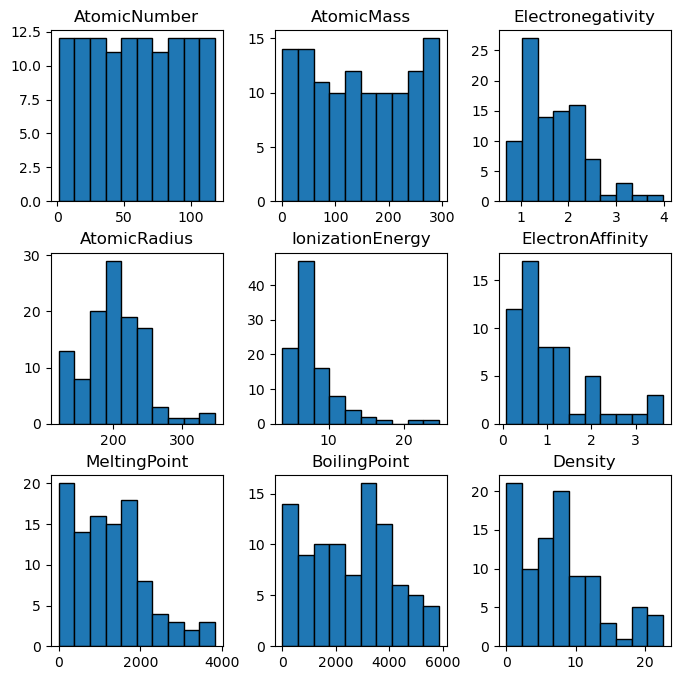

In [5]:
df.hist(figsize=(8,8), edgecolor='black', grid=False)

## Accessing Data

Pandas dataframes have names for rows (called the "index" in Pandas) and columns.

Pandas dataframes have rows and columns, you can see how many rows and columns using `.shape`. This will return the shape as `(num_rows, num_columns)`.

In [6]:
df.shape

(118, 17)

There are a few methods for accessing information in a Pandas dataframe, but the one that will be most important in this workshop is selecting particular columns of data.

In [7]:
df["AtomicNumber"].head()

0    1
1    2
2    3
3    4
4    5
Name: AtomicNumber, dtype: int64

In [8]:
df[["Symbol", "ElectronConfiguration"]].head() 

,Symbol,ElectronConfiguration
0,H,1s1
1,He,1s2
2,Li,[He]2s1
3,Be,[He]2s2
4,B,[He]2s2 2p1


## Performing calculations with pandas: No more `for` loops!

Both pandas and NumPy dataframes have the convenient feature that they can do element-wise operations and use something called `broadcasting`. This means that if you are doing something like subtracting a number, multiplying, etc to a column or dataframe of information, it can be done all at once instead of with a `for` loop. Consider if we wanted to calculate the melting point in degrees celsius for all of the elements.

Instead of writing a `for` loop that does this, we can just write the following code. This will return a pandas Series (one dimensional dataframe). 

In [9]:
df['MeltingPoint'] - 273.15

0      -259.34
1      -272.20
2       180.50
3      1286.85
4      2074.85
        ...   
113        NaN
114        NaN
115        NaN
116        NaN
117        NaN
Name: MeltingPoint, Length: 118, dtype: float64

We could do this one two columns as well.

In [10]:
df[['MeltingPoint', 'BoilingPoint']] - 273.15

,MeltingPoint,BoilingPoint
0,-259.34,-252.87
1,-272.20,-268.93
2,180.50,1341.85
3,1286.85,2470.85
4,2074.85,3999.85
...,...,...
113,NaN,NaN
114,NaN,NaN
115,NaN,NaN
116,NaN,NaN


We can save these in new dataframe columns

In [11]:
df[["MeltingPointC", "BoilingPointC"]] = df[['MeltingPoint', 'BoilingPoint']] - 273.15

### The `.apply` method

The `.apply` method in pandas is used to apply a function along a row or column of a dataframe.
This is useful when you have a custom function that you need to use on every value in a column, but there is not a NumPy or Pandas function for it.

For example, we could apply the `len` function to our `Name` column to get the number of letters in the name for each element.

In [12]:
# Number of letters in name - 
# point - you can use built in functions
df["Name"].apply(len)

0       8
1       6
2       7
3       9
4       5
       ..
113     9
114     9
115    11
116    10
117     9
Name: Name, Length: 118, dtype: int64

For an example more related to our work with RDKit, let's add some additional atomic data.
RDKit has the ability to get information about atoms.
We can create a periodic table with `Chem.GetPeriodicTable`, then use associated functions to get information about atoms.

In [13]:
from rdkit import Chem

# Initialize the periodic table
periodic_table = Chem.GetPeriodicTable()

In [14]:
df["NOuter"] = df["Symbol"].apply(periodic_table.GetNOuterElecs)
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered,MeltingPointC,BoilingPointC,NOuter
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766,-259.34,-252.87,1
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868,-272.20,-268.93,2
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817,180.50,1341.85,1
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798,1286.85,2470.85,2
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808,2074.85,3999.85,3


<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Use the `tab` key on your periodic table object to check for other values you can calculate for atoms.
Pick one to add to your periodic table dataset.

</div>

In [15]:
# pick default valence
df["DefaultValence"] = df["NOuter"].apply(periodic_table.GetDefaultValence)
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,...,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered,MeltingPointC,BoilingPointC,NOuter,DefaultValence
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,...,Gas,13.81,20.28,0.000090,Nonmetal,1766,-259.34,-252.87,1,1
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,...,Gas,0.95,4.22,0.000179,Noble gas,1868,-272.20,-268.93,2,0
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,...,Solid,453.65,1615.00,0.534000,Alkali metal,1817,180.50,1341.85,1,1
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,...,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798,1286.85,2470.85,2,0
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,...,Solid,2348.00,4273.00,2.370000,Metalloid,1808,2074.85,3999.85,3,1


We can save a CSV file with our newly calculated values using the `to_csv` function.

In [16]:
df.to_csv("data/periodic_data_processed.csv")

## Visualization

Visualizing data helps in understanding relationships and patterns that might not be apparent from raw data. Here, we will use Seaborn, a statistical visualization library, to create plots from our periodic table dataset. Seaborn is built on top of matplotlib, so if we would like to adjust any of the plots seaborn makes, we can do that through the Matplotlib interface we've used before.

We will start with a bar plot to show the ionization energy of elements across different group blocks:


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15')])

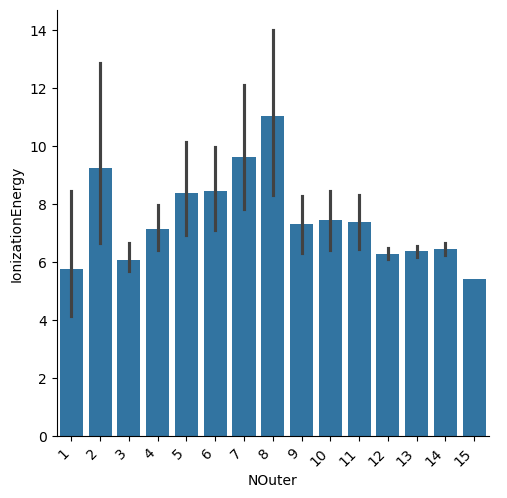

In [18]:
sns.catplot(data=df, x="NOuter", y="IonizationEnergy", kind="bar")
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

The plot above shows us periodic trends that we learned about in introductory chemistry. The two highest ionization energy categories correspond to elements with 2 valence electrons and 8 valence electrons, representing filled shells.

Seaborn can also allow us to easily create scatter plots to visualize relationships between continuous variables. For example, we can create a scatter plot to show the relationship between ionization energy and atomic radius:

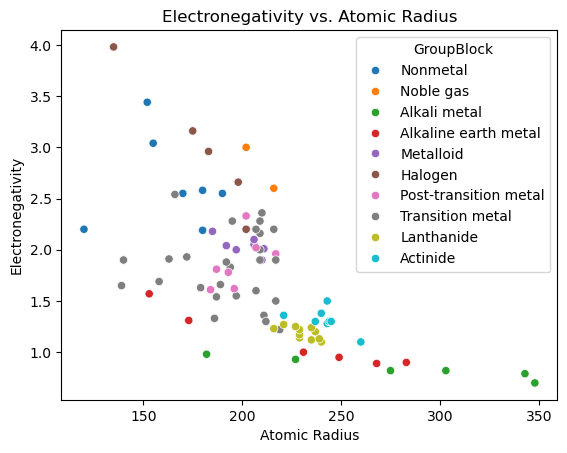

In [19]:
sns.scatterplot(data=df, x="AtomicRadius", y="Electronegativity", hue="GroupBlock")
plt.title('Electronegativity vs. Atomic Radius')
plt.xlabel('Atomic Radius')
plt.ylabel('Electronegativity')
plt.show()

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Create a few other categorical plots to observe periodic trends:

1. Electronegativity vs. Group Block as a bar plot.

2. Melting Point vs. Group Block as a bar plot.

3. Ionization Energy vs. Atomic Number as a scatter plot colored by GroupBlock.
   
</div>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Nonmetal'),
  Text(1, 0, 'Noble gas'),
  Text(2, 0, 'Alkali metal'),
  Text(3, 0, 'Alkaline earth metal'),
  Text(4, 0, 'Metalloid'),
  Text(5, 0, 'Halogen'),
  Text(6, 0, 'Post-transition metal'),
  Text(7, 0, 'Transition metal'),
  Text(8, 0, 'Lanthanide'),
  Text(9, 0, 'Actinide')])

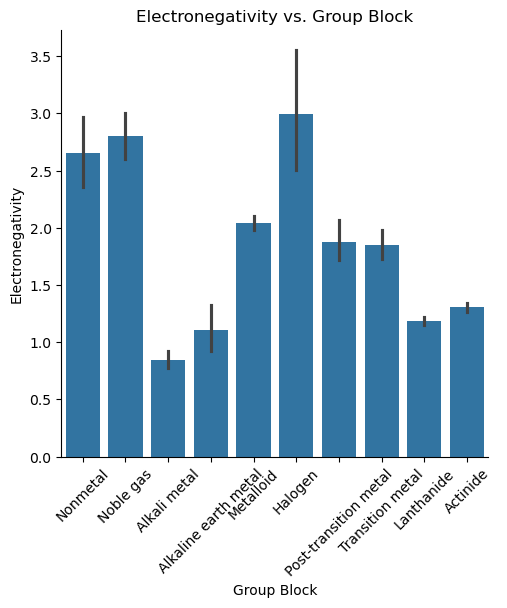

In [20]:
sns.catplot(data=df, x="GroupBlock", y="Electronegativity", kind="bar")
plt.title('Electronegativity vs. Group Block')
plt.xlabel('Group Block')
plt.ylabel('Electronegativity')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Nonmetal'),
  Text(1, 0, 'Noble gas'),
  Text(2, 0, 'Alkali metal'),
  Text(3, 0, 'Alkaline earth metal'),
  Text(4, 0, 'Metalloid'),
  Text(5, 0, 'Halogen'),
  Text(6, 0, 'Post-transition metal'),
  Text(7, 0, 'Transition metal'),
  Text(8, 0, 'Lanthanide'),
  Text(9, 0, 'Actinide')])

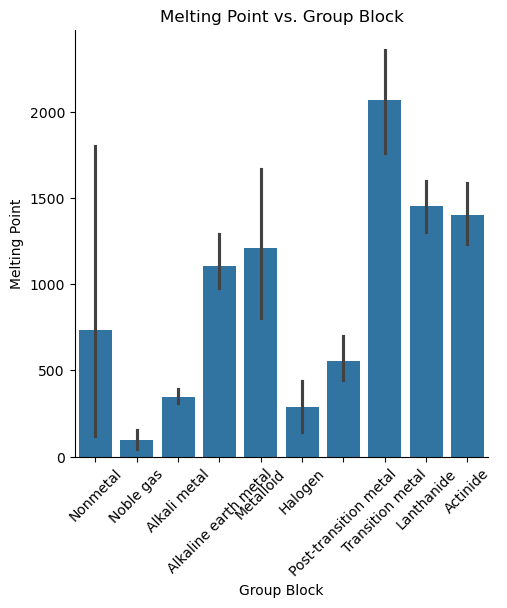

In [21]:
sns.catplot(data=df, x="GroupBlock", y="MeltingPoint", kind="bar")
plt.title('Melting Point vs. Group Block')
plt.xlabel('Group Block')
plt.ylabel('Melting Point')
plt.xticks(rotation=45)

Text(0, 0.5, 'Ionization Energy')

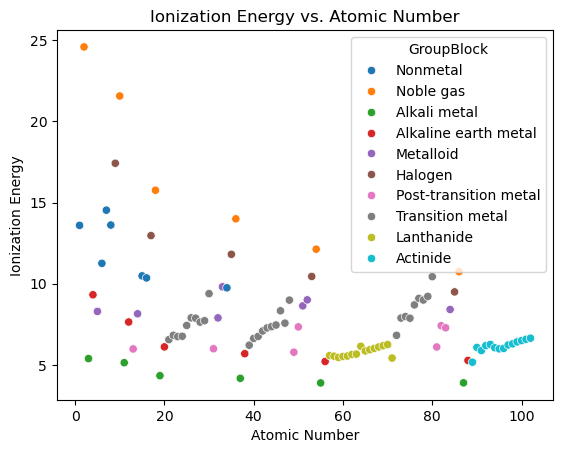

In [22]:
sns.scatterplot(data=df, x="AtomicNumber", y="IonizationEnergy", hue="GroupBlock")
plt.title('Ionization Energy vs. Atomic Number')
plt.xlabel('Atomic Number')
plt.ylabel('Ionization Energy')

### Visualizing Correlation

A common way to visualize relationships between different categories of data categories is with a correlation plot.
The correlation matrix provides insights into the relationships between the variables. A correlation value close to 1 indicates a strong positive relationship, while a correlation value close to -1 indicates a strong negative relationship. A correlation value close to 0 indicates no relationship between the features.

In [23]:
# Calculate the correlation matrix
corr = df.corr(numeric_only=True)
corr

,AtomicNumber,AtomicMass,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,MeltingPoint,BoilingPoint,Density,MeltingPointC,BoilingPointC,NOuter,DefaultValence
AtomicNumber,1.000000,0.999258,-0.333108,0.108260,-0.436061,0.033849,0.186428,0.368187,0.725570,0.186428,0.368187,0.070370,-0.201266
AtomicMass,0.999258,1.000000,-0.332860,0.103125,-0.421957,0.035010,0.176436,0.358071,0.720749,0.176436,0.358071,0.063630,-0.203701
Electronegativity,-0.333108,-0.332860,1.000000,-0.658565,0.904801,0.712926,-0.118976,-0.288225,-0.085101,-0.118976,-0.288225,0.184604,0.357319
AtomicRadius,0.108260,0.103125,-0.658565,1.000000,-0.641088,-0.317003,0.057317,0.213469,0.187537,0.057317,0.213469,0.091258,0.160444
IonizationEnergy,-0.436061,-0.421957,0.904801,-0.641088,1.000000,0.695265,-0.327232,-0.499358,-0.332260,-0.327232,-0.499358,0.048754,0.097167
ElectronAffinity,0.033849,0.035010,0.712926,-0.317003,0.695265,1.000000,-0.294207,-0.423421,-0.068024,-0.294207,-0.423421,0.447026,0.343417
MeltingPoint,0.186428,0.176436,-0.118976,0.057317,-0.327232,-0.294207,1.000000,0.888202,0.571981,1.000000,0.888202,0.242993,0.084373
BoilingPoint,0.368187,0.358071,-0.288225,0.213469,-0.499358,-0.423421,0.888202,1.000000,0.684276,0.888202,1.000000,0.143610,0.028736
Density,0.725570,0.720749,-0.085101,0.187537,-0.332260,-0.068024,0.571981,0.684276,1.000000,0.571981,0.684276,0.330893,0.070591
MeltingPointC,0.186428,0.176436,-0.118976,0.057317,-0.327232,-0.294207,1.000000,0.888202,0.571981,1.000000,0.888202,0.242993,0.084373


Seaborn can be used to create a heatmap to allow easier examination of the correlation of different variables.

<Axes: >

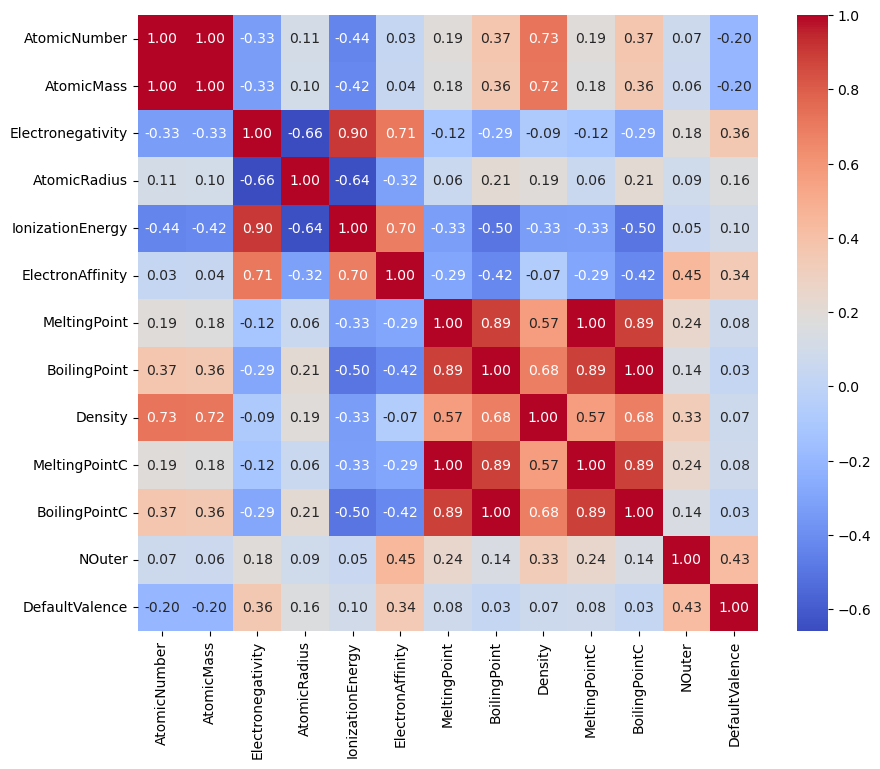

In [24]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

The heatmap uses a "coolwarm" color scheme where red indicates positive correlation and blue indicates negative correlation between variables. Strongly correlated pairs are represented by darker shades of red, while strongly inversely correlated pairs are represented by darker shades of blue.

<div class="alert alert-block alert-warning">
<h3>Final Challenge</h3>

Repeat your homework from last night using Pandas and the `.apply` function.
The creation of a starting dataframe is done for you.
You should use the `apply` function to add new columns of data to your DataFrame.

Compare and contrast the code - do you prefer one over the other?


</div>

,SMILES,Molecule
0,C[C@H](N)C(=O)O\n,
1,NC(N)=NCCC[C@H](N)C(=O)O\n,
2,NC(=O)C[C@H](N)C(=O)O\n,

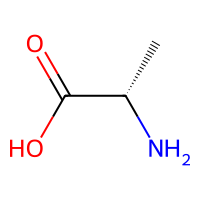
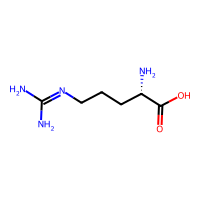
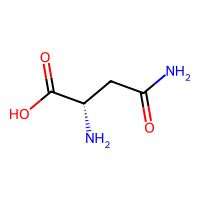

In [25]:
from rdkit import Chem
from rdkit.Chem import PandasTools

# Ensure molecules are rendered in the notebook
PandasTools.RenderImagesInAllDataFrames(images=True)

# Read SMILES strings from a file
with open("data/amino_acids.txt", "r") as f:
    amino_acid_smiles = f.readlines()

df = pd.DataFrame(amino_acid_smiles, columns=["SMILES"])

PandasTools.AddMoleculeColumnToFrame(df,'SMILES','Molecule',includeFingerprints=True)

df.head(3)

In [26]:
df["MolWt"] = df["Molecule"].apply(Descriptors.MolWt)
df["NumHeavy"] = df["Molecule"].apply(Descriptors.HeavyAtomCount)
df["TPSA"] = df["Molecule"].apply(Descriptors.rdMolDescriptors.CalcTPSA)

df.head(3)

NameError: name 'Descriptors' is not defined